In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls '/gdrive/My Drive/datasets/logo2'

test  train  valid


In [ ]:
import os 
import shutil

base_dir = '/gdrive/My Drive/datasets/logo2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
train_adi_dir = os.path.join(train_dir, 'adidas')
train_nike_dir = os.path.join(train_dir, 'nike')
validation_adi_dir = os.path.join(validation_dir, 'adidas')
validation_nike_dir = os.path.join(validation_dir, 'nike')
test_adi_dir = os.path.join(test_dir, 'adidas')
test_nike_dir = os.path.join(test_dir, 'nike')

In [ ]:
### Image data generator 를 1개 작성하세요. 
### ImageDataGenerator 는 스케일조정은 1./255. 로 설정하세요. 
### 폴더 설정은 train_dir로,  배치사이즈 20개, 이미지크기는 (150, 150)
### class_mode 는 'binary'로 설정하세요.  
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

train_datagen = ImageDataGenerator(rescale=1./255.)  #스케일 조정, 증강된 이미지
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode='binary')

Found 623 images belonging to 2 classes.


In [ ]:
# 1개의 데이터를 제너레이터로부터 얻어와서 ploting하세요. 
image, label = next(train_generator)

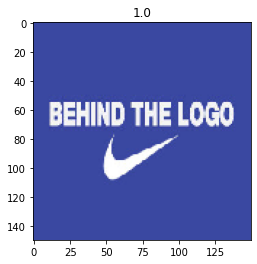

In [ ]:
plt.imshow(image[0])
plt.title(label[0])
plt.show()

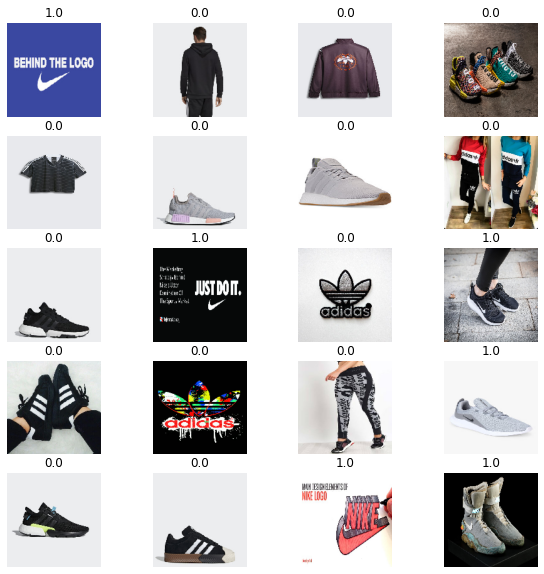

In [ ]:
plt.figure(figsize=(10,10))

# 20개의 이미지를 ploting해보세요. 
for n in range(20):
  plt.subplot(5,4,n+1)
  plt.imshow(image[n])
  plt.title(label[n])
  plt.axis('off')

In [ ]:
### Image data generator를 3개 작성하세요. 
### (train_generator, test_generator, validation_generator)
### ImageDataGenerator 는 스케일조정은 1./255. 로 설정하세요. 
### 이미지 데이터의 폴더 설정은 train_generator는 train_dir로
### test_generator는 test_dir로
### validation_generator는 validation_dir 로 설정하세요.   
### 배치사이즈 20개, 이미지크기는 (150, 150)
### class_mode 는 'binary'로 설정하세요.  
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

train_datagen = ImageDataGenerator(rescale=1./255.)  #스케일 조정, 증강된 이미지
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255.)  # 스케일 조정만 
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                  target_size=(150,150),
                                                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        target_size=(150,150),
                                                        class_mode='binary')



Found 623 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Found 197 images belonging to 2 classes.


In [ ]:
### CNN 으로 모델링하세요. 

from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential() 
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
### 학습시키세요. steps_per_epoch 는 30회, epoch은 100번, validation_steps 는 9회 

history = model.fit_generator(train_generator,
                              steps_per_epoch=30,
                              epochs=100, 
                              validation_data = validation_generator,
                              validation_steps=9) 

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/15 [==============================] - 5s 366ms/step - loss: 0.0950 - acc: 0.9700 - val_loss: 0.8282 - val_acc: 0.6700
Epoch 2/100
15/15 [==============================] - 5s 353ms/step - loss: 0.1103 - acc: 0.9533 - val_loss: 1.0194 - val_acc: 0.7200
Epoch 3/100
15/15 [==============================] - 5s 316ms/step - loss: 0.1083 - acc: 0.9541 - val_loss: 0.8821 - val_acc: 0.7600
Epoch 4/100
15/15 [==============================] - 5s 339ms/step - loss: 0.0736 - acc: 0.9633 - val_loss: 0.8299 - val_acc: 0.7000
Epoch 5/100
15/15 [==============================] - 5s 348ms/step - loss: 0.0851 - acc: 0.9700 - val_loss: 1.1941 - val_acc: 0.7000
Epoch 6/100
15/15 [==============================] - 5s 354ms/step - loss: 0.1069 - acc: 0.9633 - val_loss: 1.0279 - val_acc: 0.7100
Epoch 7/100
15/15 [==============================] - 6s 383ms/step - loss: 0.0645 - acc: 0.9767 - val_loss: 1.2959 - val_acc: 0.6400
Epoch 8/100
15/15 [==============================] - 5s 345ms/step - loss: 0.0984

In [ ]:
# 모델을 평가하세요.(evaluate_generator로 steps는 10회 설정)

model.evaluate_generator(test_generator, steps=10)

[1.1658697128295898, 0.8100000023841858]

In [ ]:
### 모델 저장을 저장하세요.  

model.save(base_dir, 'logo2_cnn_basic.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /gdrive/My Drive/datasets/logo2/assets
